In [1]:
import xarray as xr
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
from matplotlib.colors import BoundaryNorm
import numpy as np
import cmocean



In [175]:
font = {'family' : 'sans-serif',
        'weight' : 'normal',
        'size'   : 16}

plt.rc('font', **font)

In [176]:
access_sla_file = '/Users/dge105/Dropbox/_MerMEEDdata/data/external/CMEMS_SeaLevel_rep/\
dt_global_allsat_phy_l4_20161201_20170530.nc'

In [177]:
dset = xr.open_dataset(access_sla_file)
#print(dset)

In [178]:
lon_plt = [360-79, 360-70]
lat_plt = [22, 30]
lon_sla = np.array(dset.longitude)
lon_i = lon_sla[(dset.longitude >= lon_plt[0]) & (dset.longitude <= lon_plt[1])]
lon_lim = [np.min(lon_i), np.max(lon_i)]

lat_sla = np.array(dset.latitude)
lat_i = lat_sla[(dset.latitude >= lat_plt[0]) & (dset.latitude <= lat_plt[1])]
lat_lim = [np.min(lat_i), np.max(lat_i)]

In [80]:
mean_adt = dset.sla.sel(longitude=slice(281,291), latitude=slice(22,30)).mean(dim=('longitude','latitude','time'))
sla_full = dset.sla.sel(longitude=slice(281,291), latitude=slice(22,30)) - mean_adt
sla_full = sla_full[0, :, :]
sla_full.attrs['units'] = 'm'

u_sla = dset.ugos.sel(longitude=slice(281,291), latitude=slice(22,30))
v_sla = dset.vgos.sel(longitude=slice(281,291), latitude=slice(22,30))

In [6]:
%matplotlib inline

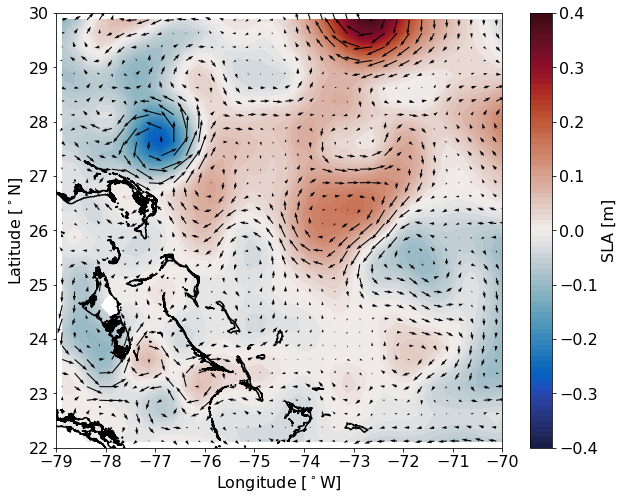

In [173]:
fig1 = plt.figure(figsize=[10,8])
ax2 = fig1.subplots()
levels = np.arange(-0.4,0.401,0.01)

# Plot SLA
CS = ax2.contourf(sla_full.longitude-360, sla_full.latitude, sla_full.data, levels, cmap=cmocean.cm.balance)

# Plot coastline
coast = np.loadtxt('/Users/dge105/Dropbox/PhD/work/AMOC_downturn/data/NA_coast.dat')
ax2.plot(coast[:,0],coast[:,1],'k')

# Plot velocity
lon_m, lat_m = np.meshgrid(sla_full.longitude.data-360, sla_full.latitude.data)

q = ax2.quiver(lon_m, lat_m, u_sla.data, v_sla.data,headwidth=3)
ax2.quiverkey(q, X=0.3, Y=1.1, U=0.5,
             label='1 m/s',labelpos='E',
             coordinates='figure')

ax2.set_ylabel('Latitude [$^\circ$N]')
ax2.set_xlabel('Longitude [$^\circ$W]')
plt.xlim(lon_plt[0]-360, lon_plt[1]-360)
plt.ylim(lat_plt[0], lat_plt[1])

cbar = fig1.colorbar(CS,ticks=np.arange(-0.4, 0.5, 0.1))
cbar.ax.set_ylabel('SLA [m]')

plt.savefig('/Users/dge105/Dropbox/MerMEED/work/eddy_WB_diss/analysis/fig_20190516/sla_cont.png', dpi=300)

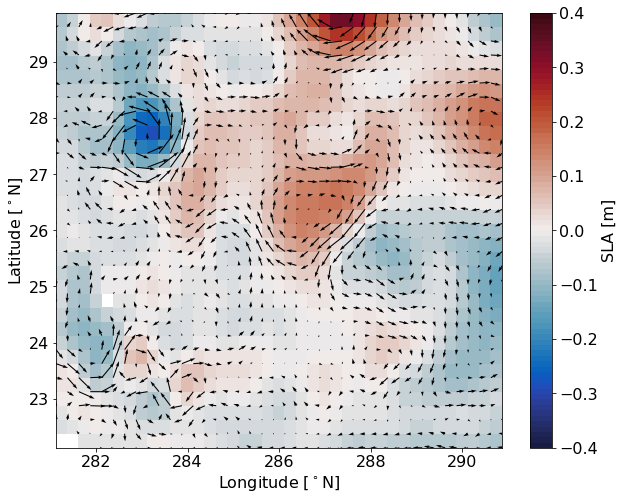

In [157]:
fig2 = plt.figure(figsize=[10,8])
ax2 = fig2.subplots()
levels = np.arange(-0.4,0.401,0.01)

cmap = cmocean.cm.balance
norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)
CS = ax2.pcolormesh(sla_full.longitude, sla_full.latitude, sla_full.data, cmap=cmap, norm=norm)

lon_m, lat_m = np.meshgrid(sla_full.longitude.data, sla_full.latitude.data)

q = ax2.quiver(lon_m, lat_m, u_sla.data, v_sla.data,headwidth=3)
ax2.quiverkey(q, X=0.3, Y=1.1, U=0.5,
             label='1 m/s',labelpos='E',
             coordinates='figure')

ax2.set_ylabel('Latitude [$^\circ$N]')
ax2.set_xlabel('Longitude [$^\circ$N]')

cbar = fig2.colorbar(CS,ticks=np.arange(-0.4, 0.5, 0.1))
cbar.ax.set_ylabel('SLA [m]')

plt.savefig('/Users/dge105/Dropbox/MerMEED/work/eddy_WB_diss/analysis/fig_20190516/sla_pcol.png', dpi=300)